Lets get some polygons!


In [ ]:
!wget -O benthic_ground_truth.zip https://nscc-my.sharepoint.com/:u:/g/personal/w0001006_campus_nscc_ca/EaYM7nvthFFPm7MXx357X4UBm-xe1uGJVOOg-WpXbPeWGQ?download=1

--2021-03-30 14:19:50--  https://nscc-my.sharepoint.com/:u:/g/personal/w0001006_campus_nscc_ca/EaYM7nvthFFPm7MXx357X4UBm-xe1uGJVOOg-WpXbPeWGQ?download=1
Resolving nscc-my.sharepoint.com (nscc-my.sharepoint.com)... 13.107.136.9
Connecting to nscc-my.sharepoint.com (nscc-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/w0001006_campus_nscc_ca/Documents/For_Kevin/Revised/benthic_ground_truth.zip?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzp1Oi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VhWU03bnZ0aEZGUG03TVh4MzU3WDRVQm0teGUxdUdKVk9PZy1XcFhiUGVXR1E_cnRpbWU9THlYZTRZYnoyRWc [following]
--2021-03-30 14:19:51--  https://nscc-my.sharepoint.com/personal/w0001006_campus_nscc_ca/Documents/For_Kevin/Revised/benthic_ground_truth.zip?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzp1Oi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VhWU03bnZ0aEZGUG03TVh4MzU3WDRVQm0teGUxdUdKVk9PZy1XcFhiUGVXR1E_cnRpbWU9THlYZTRZ

In [ ]:
!unzip benthic_ground_truth.zip

Archive:  benthic_ground_truth.zip
 extracting: benthic_ground_truth.cpg  
  inflating: benthic_ground_truth.dbf  
  inflating: benthic_ground_truth.prj  
  inflating: benthic_ground_truth.sbn  
  inflating: benthic_ground_truth.sbx  
  inflating: benthic_ground_truth.shp  
  inflating: benthic_ground_truth.shx  


In [ ]:
!pip install git+https://github.com/NSCC-COGS/Aestheta.git@dev --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 6.8MB/s 


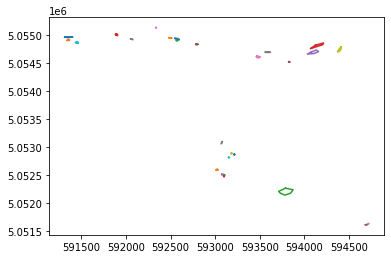

In [ ]:
from aestheta import core
shp = 'benthic_ground_truth'
shape = core.shpreader(shp, show=True)


# First lets try using matplotlib!

In [ ]:
!pip install pyshp

In [ ]:
import shapefile

In [ ]:
shpPath = 'benthic_ground_truth'
shp = shapefile.Reader(shpPath)

In [ ]:
help(shp)

Help on Reader in module shapefile object:

class Reader(builtins.object)
 |  Reader(*args, **kwargs)
 |  
 |  Reads the three files of a shapefile as a unit or
 |  separately.  If one of the three files (.shp, .shx,
 |  .dbf) is missing no exception is thrown until you try
 |  to call a method that depends on that particular file.
 |  The .shx index file is used if available for efficiency
 |  but is not required to read the geometry from the .shp
 |  file. The "shapefile" argument in the constructor is the
 |  name of the file you want to open.
 |  
 |  You can instantiate a Reader without specifying a shapefile
 |  and then specify one later with the load() method.
 |  
 |  Only the shapefile headers are read upon loading. Content
 |  within each file is only accessed when required and as
 |  efficiently as possible. Shapefiles are usually not large
 |  but they can be.
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __enter__(self)
 |      Enter phase of context mana

In [ ]:
# https://stackoverflow.com/questions/8369219/how-to-read-a-text-file-into-a-string-variable-and-strip-newlines
shpRef = open(shpPath+'.prj', 'r').read()
print(shpRef)

PROJCS["NAD_1983_UTM_Zone_20N",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",-63.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]


In [ ]:
len(shp)

28

In [ ]:
shp.shape(0).points

[(592548.211913704, 5054935.984943513),
 (592559.641936565, 5054937.889947325),
 (592572.5007122837, 5054934.873691291),
 (592590.4394981605, 5054925.031171603),
 (592598.5357643532, 5054915.029901607),
 (592597.1070114964, 5054909.791141126),
 (592587.1057414941, 5054908.83863922),
 (592577.4219721267, 5054912.331146203),
 (592567.5794524413, 5054917.8874073215),
 (592554.4031760884, 5054926.301174148),
 (592548.211913704, 5054935.984943513)]

In [ ]:
import numpy as np
pt0 = np.array(shp.shape(0).points)
print(pt0.shape)

(11, 2)


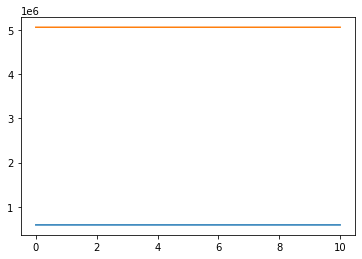

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pt0)
plt.show()

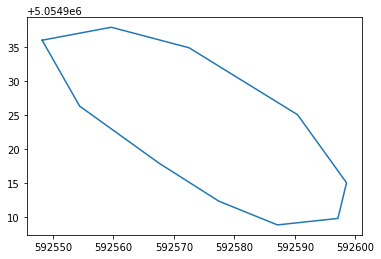

In [ ]:
plt.plot(*pt0.T)
plt.show()

In [ ]:
x,y = pt0.T
print(x.min())
print(x.max())
print(y.min())
print(y.max())

592548.211913704
592598.5357643532
5054908.83863922
5054937.889947325


In [ ]:
x-=x.min()
y-=y.min()

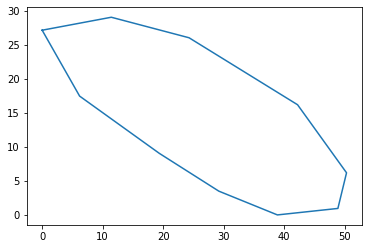

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
xy = np.vstack((x,y)).T

In [ ]:
a = range(20)
for e in a:
  print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


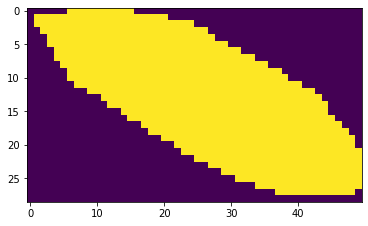

False True


In [ ]:
from matplotlib.path import Path

nx, ny = int(x.max()), int(y.max())
poly_verts = pt0

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
j, k = np.meshgrid(np.arange(nx), np.arange(ny))
j, k = j.flatten(), k.flatten()

points = np.vstack((j,k)).T

path = Path(xy)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))

grid = np.flipud(grid)

plt.imshow(grid)
plt.show()
print(grid.min(), grid.max())

# https://stackoverflow.com/questions/3654289/scipy-create-2d-polygon-mask

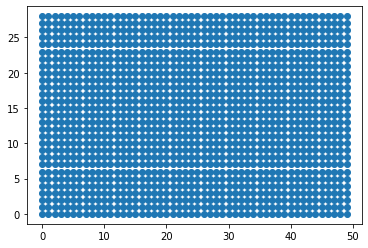

In [ ]:
plt.scatter(j,k)
plt.show()

In [ ]:
shp.record(0)

Record #0: [1, 'Eelgrass']

In [ ]:
code = shp.record(0)[0]

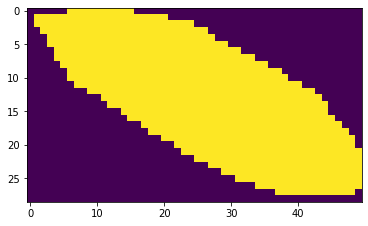

0.0 1.0


In [ ]:
grid = grid.astype(float)
grid*=code

plt.imshow(grid)
plt.show()
print(grid.min(), grid.max())

# lets try it on our raster

In [ ]:
!wget -O PQ_Lidar_DEMo13.tif https://nscc-my.sharepoint.com/:i:/g/personal/w0001006_campus_nscc_ca/ETLMGXbg1GpKph8-J0TNs60B-wdefo7rmRwp6FNMdkVOUw?download=1

--2021-04-03 21:02:30--  https://nscc-my.sharepoint.com/:i:/g/personal/w0001006_campus_nscc_ca/ETLMGXbg1GpKph8-J0TNs60B-wdefo7rmRwp6FNMdkVOUw?download=1
Resolving nscc-my.sharepoint.com (nscc-my.sharepoint.com)... 13.107.136.9
Connecting to nscc-my.sharepoint.com (nscc-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/w0001006_campus_nscc_ca/Documents/For_Kevin/Revised/2018_North_Lidar_Filled_DEMo13.tif?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzppOi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VUTE1HWGJnMUdwS3BoOC1KMFROczYwQi13ZGVmbzdybVJ3cDZGTk1ka1ZPVXc_cnRpbWU9eE10aXpPUDIyRWc [following]
--2021-04-03 21:02:32--  https://nscc-my.sharepoint.com/personal/w0001006_campus_nscc_ca/Documents/For_Kevin/Revised/2018_North_Lidar_Filled_DEMo13.tif?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzppOi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VUTE1HWGJnMUdwS3BoOC1KMFROczYwQi13ZGVmbzdybVJ3cDZGTk1ka1ZP

In [ ]:
!ls

benthic_ground_truth.cpg  benthic_ground_truth.sbx  PQ_Lidar_DEMo13.tif
benthic_ground_truth.dbf  benthic_ground_truth.shp  sample_data
benthic_ground_truth.prj  benthic_ground_truth.shx
benthic_ground_truth.sbn  benthic_ground_truth.zip


In [ ]:
import imageio
demPath = 'PQ_Lidar_DEMo13.tif'
dem = imageio.imread(demPath)
print(dem.shape, dem.size)
print(dem.max(), dem.min())

(9613, 10067) 96774071
62.141193 -3.402823e+38


In [ ]:
# https://stackoverflow.com/questions/55040017/read-tiff-tags-in-python
import tifffile
with tifffile.TiffFile(demPath) as tif:
    tif_tags = {}
    for tag in tif.pages[0].tags.values():
        name, value = tag.name, tag.value
        tif_tags[name] = value
    # image = tif.pages[0].asarray()

# dir(tif_tags)
for i in tif_tags.keys():
  print(i)



ImageWidth
ImageLength
BitsPerSample
Compression
PhotometricInterpretation
SamplesPerPixel
PlanarConfiguration
TileWidth
TileLength
TileOffsets
TileByteCounts
SampleFormat
ModelPixelScaleTag
ModelTiepointTag
GeoKeyDirectoryTag
GeoDoubleParamsTag
GeoAsciiParamsTag
GDAL_METADATA
GDAL_NODATA


In [ ]:
tif_tags['SampleFormat']

<SAMPLEFORMAT.IEEEFP: 3>

In [ ]:
# https://stackoverflow.com/questions/5904969/how-to-print-a-dictionarys-key
for i in tif_tags.keys():
  print(i)
  print(' ',tif_tags[i])

ImageWidth
  10067
ImageLength
  9613
BitsPerSample
  32
Compression
  COMPRESSION.NONE
PhotometricInterpretation
  PHOTOMETRIC.MINISBLACK
SamplesPerPixel
  1
PlanarConfiguration
  PLANARCONFIG.CONTIG
TileWidth
  128
TileLength
  128
TileOffsets
  (208322693, 208388229, 208453765, 208519301, 208584837, 208650373, 208715909, 208781445, 208846981, 208912517, 208978053, 209043589, 209109125, 209174661, 209240197, 209305733, 209371269, 209436805, 209502341, 209567877, 209633413, 209698949, 209764485, 209830021, 209895557, 209961093, 210026629, 49285, 114821, 180357, 245893, 210092165, 210157701, 210223237, 210288773, 210354309, 210419845, 210485381, 210550917, 210616453, 210681989, 210747525, 210813061, 210878597, 210944133, 211009669, 211075205, 211140741, 211206277, 211271813, 211337349, 211402885, 211468421, 211533957, 211599493, 211665029, 211730565, 211796101, 211861637, 211927173, 211992709, 212058245, 212123781, 212189317, 212254853, 212320389, 212385925, 212451461, 212516997, 21258

In [ ]:
want = [
        'ImageWidth',
        'ImageLength',
        'ModelPixelScaleTag',
        'ModelTiepointTag',
        'GeoKeyDirectoryTag',
        'GeoAsciiParamsTag',
        'GeoDoubleParamsTag',
        'GDAL_METADATA',
        'GDAL_NODATA',
]

for i in want:
  print(i)
  print(tif_tags[i])

ImageWidth
10067
ImageLength
9613
ModelPixelScaleTag
(1.0, 1.0, 0.0)
ModelTiepointTag
(0.0, 0.0, 0.0, 586861.074000001, 5058073.693000004, 0.0)
GeoKeyDirectoryTag
(1, 1, 0, 16, 1024, 0, 1, 1, 1025, 0, 1, 1, 1026, 34737, 38, 0, 2048, 0, 1, 4617, 2049, 34737, 116, 38, 2050, 0, 1, 6140, 2051, 0, 1, 8901, 2054, 0, 1, 9102, 2055, 34736, 1, 0, 2056, 0, 1, 7019, 2057, 34736, 1, 1, 2059, 34736, 1, 2, 2061, 34736, 1, 3, 3072, 0, 1, 2961, 3073, 34737, 457, 154, 3076, 0, 1, 9001)
GeoAsciiParamsTag
PCS Name = NAD_1983_CSRS_UTM_Zone_20N|GCS Name = GCS_North_American_1983_CSRS|Datum = D_North_American_1983_CSRS|Ellipsoid = GRS_1980|Primem = Greenwich||ESRI PE String = PROJCS["NAD_1983_CSRS_UTM_Zone_20N",GEOGCS["GCS_North_American_1983_CSRS",DATUM["D_North_American_1983_CSRS",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Me

# Lets Try RasterIO

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 54.7MB/s 


In [ ]:
import rasterio

# https://rasterio.readthedocs.io/en/latest/topics/georeferencing.html

src = rasterio.open(demPath)
print(src.crs)
print(src.crs.wkt)
print(src.transform)


EPSG:2961
PROJCS["NAD_1983_CSRS_UTM_Zone_20N",GEOGCS["NAD83(CSRS)",DATUM["NAD83_Canadian_Spatial_Reference_System",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6140"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4617"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","2961"]]
| 1.00, 0.00, 586861.07|
| 0.00,-1.00, 5058073.69|
| 0.00, 0.00, 1.00|


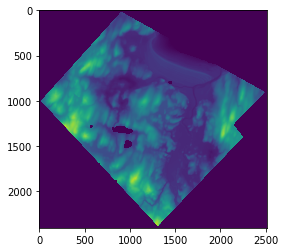

In [ ]:
plt.imshow(src.read(1)[::4,::4],vmin=-10)
plt.show()

In [ ]:
!pip install fiona

     |████████████████████████████████| 14.8MB 316kB/s 


In [ ]:
#https://gis.stackexchange.com/questions/269947/rasterio-does-not-execute-the-rasterize-function

import rasterio
import numpy as np
from rasterio import features
import fiona

#Load vector file with fiona
vector_file = 'benthic_ground_truth.shp'

shapefile = fiona.open(vector_file)
geom = [shapes['geometry'] for shapes in shapefile]
attrib = [shapes['properties'] for shapes in shapefile]

print(shapefile.crs)

# geom2 = fiona.transform.transform_geom('EPSG:4326', 'EPSG:26953',geom)
# fiona.transform.transform('EPSG:4326', 'EPSG:26953', [-105.0], [40.0])


#filter to features where type = parking
# type_match_idx = [i for i, feature in enumerate(attrib) if feature['type'] == 'eelgrass']
# feature_geom = [geom[i] for i in type_match_idx]
# feature_attrib = [attrib[i] for i in type_match_idx]

#get metadata for satellite imagery
image = features.rasterize(geom, out_shape=src.shape, transform=src.transform)

with rasterio.open(
        'rasterized-results2.tif', 'w',
        driver='GTiff',
        transform = src.transform,
        dtype=rasterio.uint8,
        count=1,
        width=src.width,
        height=src.height) as dst:
        dst.write(image, indexes=1)

{'init': 'epsg:26920'}


In [ ]:
print(image.min(), image.max())

0 1


In [ ]:
print(np.unique(image))

[0 1]


In [ ]:
image = image.astype(float)
# image[image==0]=np.NaN

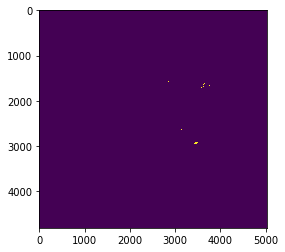

In [ ]:
plt.imshow(image[::2,::2], interpolation='nearest')
# plt.imshow(image[::2,::2])
plt.show()

-3.402823e+38


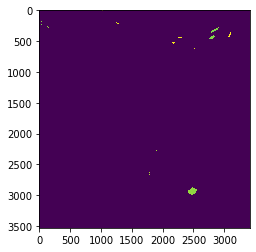

In [ ]:
# https://rasterio.readthedocs.io/en/latest/topics/masking-by-shapefile.html

import rasterio.mask

with fiona.open(vector_file, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(demPath) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

# out_meta.update({"driver": "GTiff",
#                  "height": out_image.shape[1],
#                  "width": out_image.shape[2],
#                  "transform": out_transform})

plt.imshow(out_image[0,:,:], interpolation='nearest',vmin=-10)
plt.show()

In [ ]:
# https://rasterio.readthedocs.io/en/latest/topics/features.html
# next steps are to set these values to class code

In [ ]:
# resample two raster to be identical in rasterio

In [ ]:
# rasterize shape/polygon by class code

In [ ]:
# optional, iterate by bounding box?

In [ ]:
# we need more ground truth data!

In [ ]:
# move into code base!

# Digging around

In [ ]:
shp.records()

[Record #0: [1, 'Eelgrass'],
 Record #1: [1, 'Eelgrass'],
 Record #2: [1, 'Eelgrass'],
 Record #3: [1, 'Eelgrass'],
 Record #4: [1, 'Eelgrass'],
 Record #5: [1, 'Eelgrass'],
 Record #6: [1, 'Eelgrass'],
 Record #7: [1, 'Eelgrass'],
 Record #8: [2, 'Fucus seaweed'],
 Record #9: [1, 'Eelgrass'],
 Record #10: [1, 'Eelgrass'],
 Record #11: [1, 'Eelgrass'],
 Record #12: [3, 'Dark SAV'],
 Record #13: [3, 'Dark SAV'],
 Record #14: [3, 'Dark SAV'],
 Record #15: [2, 'Fucua seaweed'],
 Record #16: [4, 'Sand'],
 Record #17: [4, 'Sand'],
 Record #18: [4, 'Sand'],
 Record #19: [5, 'Deep Sand'],
 Record #20: [5, 'Deep Sand'],
 Record #21: [5, 'Deep Sand'],
 Record #22: [5, 'Deep Sand'],
 Record #23: [6, 'Sand with Eelgrass'],
 Record #24: [6, 'Sand with Eelgrass'],
 Record #25: [7, 'Unhealthy Eelgrass'],
 Record #26: [7, 'Unhealthy Eelgrass'],
 Record #27: [7, 'Unhealthy Eelgrass']]

In [ ]:
for i in shp.shapes():
  print(i.points)

[(592548.211913704, 5054935.984943513), (592559.641936565, 5054937.889947325), (592572.5007122837, 5054934.873691291), (592590.4394981605, 5054925.031171603), (592598.5357643532, 5054915.029901607), (592597.1070114964, 5054909.791141126), (592587.1057414941, 5054908.83863922), (592577.4219721267, 5054912.331146203), (592567.5794524413, 5054917.8874073215), (592554.4031760884, 5054926.301174148), (592548.211913704, 5054935.984943513)]
[(592482.4892822586, 5054946.938715422), (592498.3643140075, 5054944.081209706), (592502.4918222624, 5054941.223703992), (592509.476836234, 5054938.683698909), (592515.9855992503, 5054940.429952407), (592511.2230897261, 5054935.508692564), (592501.5393203585, 5054936.937445419), (592490.7442987689, 5054940.429952407), (592486.6167905136, 5054940.588702723), (592482.4892822586, 5054946.938715422)]
[(592565.9919492649, 5054904.076129699), (592579.8032268872, 5054893.122357789), (592571.8657110116, 5054891.376104293), (592563.2931938672, 5054893.598608738), (

In [ ]:
print(shape)

shapefile Reader
    28 shapes (type 'POLYGON')
    28 records (3 fields)


In [ ]:
# https://stackoverflow.com/questions/1006169/how-do-i-look-inside-a-python-object/38629300
for i in dir(shape):
  print(i)
  try:
    print(getattr(shape, i))
  except:
    pass
  print()


_Reader__dbfHdrLength
97

_Reader__dbfHeader
<bound method Reader.__dbfHeader of <shapefile.Reader object at 0x7f1d8b361d90>>

_Reader__fieldposition_lookup
{'Id': 0, 'Cover_type': 1}

_Reader__getFileObj
<bound method Reader.__getFileObj of <shapefile.Reader object at 0x7f1d8b361d90>>

_Reader__recStruct

_Reader__record
<bound method Reader.__record of <shapefile.Reader object at 0x7f1d8b361d90>>

_Reader__recordFmt
<bound method Reader.__recordFmt of <shapefile.Reader object at 0x7f1d8b361d90>>

_Reader__recordLength
32

_Reader__restrictIndex
<bound method Reader.__restrictIndex of <shapefile.Reader object at 0x7f1d8b361d90>>

_Reader__shape
<bound method Reader.__shape of <shapefile.Reader object at 0x7f1d8b361d90>>

_Reader__shapeIndex
<bound method Reader.__shapeIndex of <shapefile.Reader object at 0x7f1d8b361d90>>

_Reader__shpHeader
<bound method Reader.__shpHeader of <shapefile.Reader object at 0x7f1d8b361d90>>

__class__
<class 'shapefile.Reader'>

__del__
<bound method Read

In [ ]:
help(shape.records)

TypeError: ignored

In [ ]:
import pandas as pd

In [ ]:
def read_shapefile(sf_shape):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """

    fields = [x[0] for x in sf_shape.fields][1:]
    records = [y[:] for y in sf_shape.records()]
    #records = sf_shape.records()
    shps = [s.points for s in sf_shape.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [ ]:
dframe = read_shapefile(shape)

ValueError: ignored

In [ ]:
shape(shape.records())

ValueError: ignored

In [ ]:
import pprint
import rasterio
from rasterio import features

import requests

x,y,z = 0,0,0
url = f'http://mt.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'
print(url)

headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
res = requests.get(url, stream=True, headers=headers)

with rasterio.open(res.content) as src:
    blue = src.read(3)

mask = blue != 255
shapes = features.shapes(blue, mask=mask)
pprint.pprint(next(shapes))

http://mt.google.com/vt/lyrs=m&x=0&y=0&z=0


TypeError: ignored

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.5MB/s 


In [ ]:
image = features.rasterize(
            ((g, 255) for g, v in shapes),
            out_shape=src.shape)

NameError: ignored

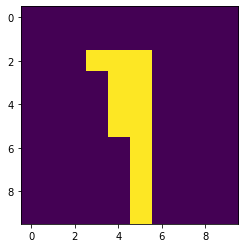

In [ ]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt

nx, ny = 10, 10
poly_verts = [(1,1), (5,1), (5,9),(3,2),(1,1)]

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path = Path(poly_verts)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))

plt.imshow(grid)
plt.show()

# But what about GDAL?

In [ ]:
# https://colab.research.google.com/github/bwsi-hadr/00-InitialSetup/blob/master/00_InitialSetup.ipynb#scrollTo=M5gF6uvA3mwo
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal ## this should replace step 2 and 3 above

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [49.8 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 h